In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
sns.set_theme(color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score, mean_squared_error as mse

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
print("No. of missing values: \n",df.isnull().sum())

No. of missing values: 
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


<Axes: xlabel='IsActiveMember'>

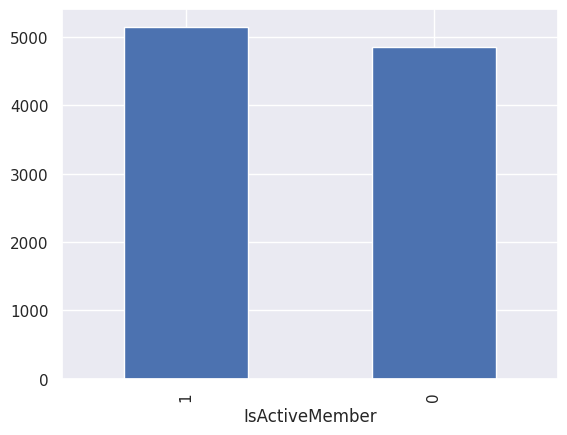

In [ ]:
df['IsActiveMember'].value_counts().head().plot.bar()

In [ ]:
sizes = df['IsActiveMember'].value_counts(sort = True)
labels = np.unique(df.IsActiveMember)

In [ ]:
df.drop(['CustomerId'], axis = 1, inplace = True)

In [ ]:
df['EstimatedSalary'] =  df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean())

In [ ]:
y = df.IsActiveMember.values

In [ ]:
df = pd.get_dummies(df)
X = df.drop(["IsActiveMember"],axis=1)

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state=1)


In [ ]:
rfc = RF(max_depth= 5, n_estimators= 10, max_features= 'auto')
rfc = rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)
print("Mean-squared error using Random Forest Classifier:", mse(y_test, prediction))
print("Accuracy with Random Forest Classifier:",accuracy_score(y_test, prediction))

Mean-squared error using Random Forest Classifier: 0.4665
Accuracy with Random Forest Classifier: 0.5335


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
prediction = rfc.predict(X_test)
print("Mean-squared error using Random Forest Classifier:", mse(y_test, prediction))
print("Accuracy with Random Forest Classifier:", accuracy_score(y_test, prediction))
print("R2 Score:", r2_score(y_test, prediction))
print("Recall Score:", recall_score(y_test, prediction, average='weighted'))
print("F1 Score:", f1_score(y_test, prediction, average='weighted'))

Mean-squared error using Random Forest Classifier: 0.4665
Accuracy with Random Forest Classifier: 0.5335
R2 Score: -0.8725182359794443
Recall Score: 0.5335
F1 Score: 0.3951926178134804


In [ ]:
logreg = LR(C = 1)
logreg = logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
print("Mean-squared error using Logistic Regression:", mse(y_test, prediction))
print("Accuracy with Logistic Regression:",accuracy_score(y_test, prediction))

Mean-squared error using Logistic Regression: 0.4755
Accuracy with Logistic Regression: 0.5245


In [ ]:
prediction = logreg.predict(X_test)
print("Mean-squared error using Logistic Regression:", mse(y_test, prediction))
print("Accuracy with Logistic Regression:", accuracy_score(y_test, prediction))
print("R2 Score:", r2_score(y_test, prediction))
print("Recall Score:", recall_score(y_test, prediction, average='weighted'))
print("F1 Score:", f1_score(y_test, prediction, average='weighted'))

Mean-squared error using Logistic Regression: 0.4755
Accuracy with Logistic Regression: 0.5245
R2 Score: -0.9086439897282441
Recall Score: 0.5245
F1 Score: 0.44996549230950067
